In [ ]:
import pandas as pd

df = pd.read_csv('../data/abt_churn.csv')
df.head()

In [ ]:
oot = df[df["dtRef"]==df['dtRef'].max()].copy()
oot.head() 

In [ ]:
df_train = df[df['dtRef']<df['dtRef'].max()].copy()
df_train.head()

In [ ]:
features = df_train.columns[2:-1]

target = 'flagChurn'

X, y = df_train[features], df_train[target]

In [ ]:
from sklearn import model_selection 

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                                    random_state=42,
                                                                    test_size=0.2,
                                                                    stratify=y)

In [ ]:
print("Taxa variável resposta no treino: %.2f%%" % (y_train.mean()*100))
print("Taxa variável resposta no treino: %.2f%%" % (y_test.mean()*100))

Explore data

In [ ]:
X_train.isna().sum().sort_values(ascending=False)

In [ ]:
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [ ]:
df_analise = X_train.copy()
df_analise[target] = y_train

summary = df_analise.groupby(by=target).agg(['mean', 'median']).T
summary

In [ ]:
summary['diff_abs'] = summary[0] - summary[1]
summary['diff_rel'] = summary[0] / summary[1] 
summary = summary.sort_values(by='diff_rel', ascending=False)
summary.head()

In [ ]:
from sklearn import tree

model_tree = tree.DecisionTreeClassifier(random_state=42,
                                   max_depth=3)

model_tree.fit(X_train, y_train)

[Text(0.5, 0.875, 'qtdeDiasD14 <= 2.5\ngini = 0.498\nsamples = 4154\nvalue = [2206, 1948]\nclass = 0'),
 Text(0.25, 0.625, 'propAvgQtdeDias <= 0.546\ngini = 0.471\nsamples = 2900\nvalue = [1098.0, 1802.0]\nclass = 1'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'qtdePontosPosD7 <= 1.5\ngini = 0.4\nsamples = 1578\nvalue = [436, 1142]\nclass = 1'),
 Text(0.0625, 0.125, 'gini = 0.34\nsamples = 1104\nvalue = [240, 864]\nclass = 1'),
 Text(0.1875, 0.125, 'gini = 0.485\nsamples = 474\nvalue = [196, 278]\nclass = 1'),
 Text(0.375, 0.375, 'qtdeDiasUltimaTransacao <= 13.5\ngini = 0.5\nsamples = 1322\nvalue = [662, 660]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.481\nsamples = 746\nvalue = [446.0, 300.0]\nclass = 0'),
 Text(0.4375, 0.125, 'gini = 0.469\nsamples = 576\nvalue = [216, 360]\nclass = 1'),
 Text(0.75, 0.625, 'qtdeTransacoesD7 <= 1.5\ngini = 0.206\nsamples = 1254\nvalue = [1108, 146]\nclass = 0'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'propAvgQtdePontosPos <= 0.80

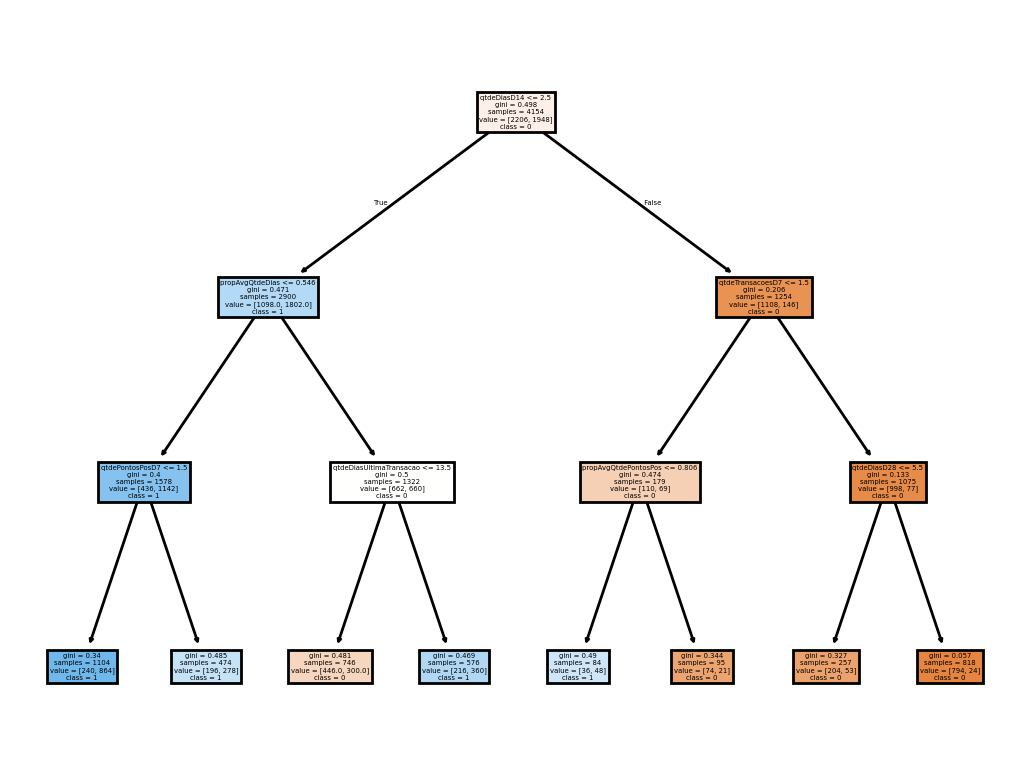

In [42]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)
tree.plot_tree(model_tree,
               feature_names=X_train.columns,
               filled=True,
               class_names=[str(i) for i in model_tree.classes_]
               )